In [25]:
# From Chapter 2:  Exercises 2.3, 2.4, and 2.9

# From Chapter 3:  Exercises 3.1, 3.2, 3.5, 3.6, and 3.9

#2.3
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
p = 1000
alpha = 1
max_steps = 8
init_point = [2, 2]

want to minimize $g(w_0,w_1) = tanh(4w_0 + 4w_1) + max(0.4w^2_0,1) + 1$

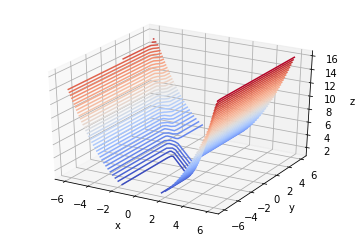

In [158]:
def func_to_evaluate(point):
    return np.tanh(4*point[0] + 4*point[1]) + max(.4*point[0]**2,1) + 1

def evaluate_points(xs, ys):
    results = np.empty(20)
    for x in xs:
        for y in ys:
            results += func_to_evaluate([x,y])
    return results


def f(x, y):
    return (np.tanh(4*x + 4*y) + np.maximum(.4*x**2,np.ones((30,30))) + 1)

from matplotlib import cm
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

[2.999999997924676, 2.9998300844506027, 1.2512060486067766, 1.000003506324937, 1.0000000000427938, 1.0000000000000098, 1.0, 1.0]


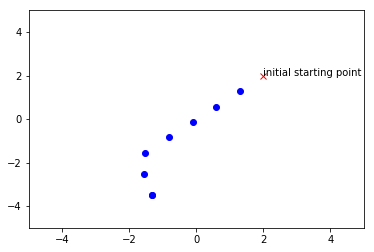

In [159]:
import random
import math

min_inputs = []
steps = [] #evaluation at each step
min_xy = [init_point]
# min_inputs.append(min_xy)
ax = plt.plot(init_point[0], init_point[1], 'rx')
plt.annotate('initial starting point', xy=(init_point[0], init_point[1]))
plt.ylim(-5,5)
plt.xlim(-5,5)
point = init_point
for j in range(max_steps):
    min_output = func_to_evaluate(point)
    thetas_tried = []
    for i in range(p):
        theta = round(random.uniform(0, 360),2)
        while theta in thetas_tried:
            theta = round(random.uniform(0, 360),2)
        
        thetas_tried.append(theta)
        x = point[0] + alpha * math.cos(math.radians(theta))
        y = point[1] + alpha * math.sin(math.radians(theta))
        z = func_to_evaluate([x,y])
        if z < min_output:
            min_output = z
            min_xy = [x,y]
    point = min_xy
    plt.plot(min_xy[0], min_xy[1], 'bo')
    steps.append(min_output)
    min_inputs.append(min_xy)
print(steps)

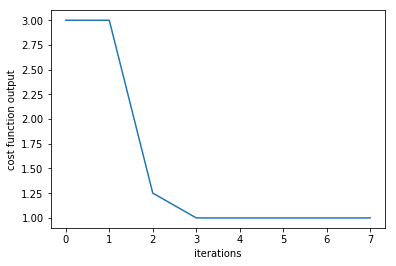

In [161]:
plt.plot(steps)
plt.xlabel("iterations")
plt.ylabel("cost function output")
plt.show()

In [156]:
print("The w0,w1 pairs for the iterations: ")
for point in min_inputs:
    print("w0 = ", round(point[0],3), ", w1 = ", round(point[1],3))
    


The w0,w1 pairs for the iterations: 
w0 =  1.291 , w1 =  1.295
w0 =  0.589 , w1 =  0.583
w0 =  -0.123 , w1 =  -0.119
w0 =  -0.832 , w1 =  -0.825
w0 =  -1.537 , w1 =  -1.534
w0 =  -1.574 , w1 =  -2.533
w0 =  -1.492 , w1 =  -3.53
w0 =  -1.492 , w1 =  -3.53
